##Final Project Submission

Student name:    Github profile link
* Philip Mweri :  https://github.com/dukebaya
* Chepkemoi Ruto :  https://github.com/LCR2022
* Moses Wanja :  https://github.com/moseskigo
* Mark Kamau : https://github.com/BigmanMKG
* Stephanie Mwai :  https://github.com/stephaniemwai
* Miriam Ongare : https://github.com/Miriam-Ivy

Students pace:  Part time

Scheduled project review date/time:

Instructor name: Samuel Jane

Blog post URL:

#Optimizing Real Estate Pricing Strategy for Maximized Profits


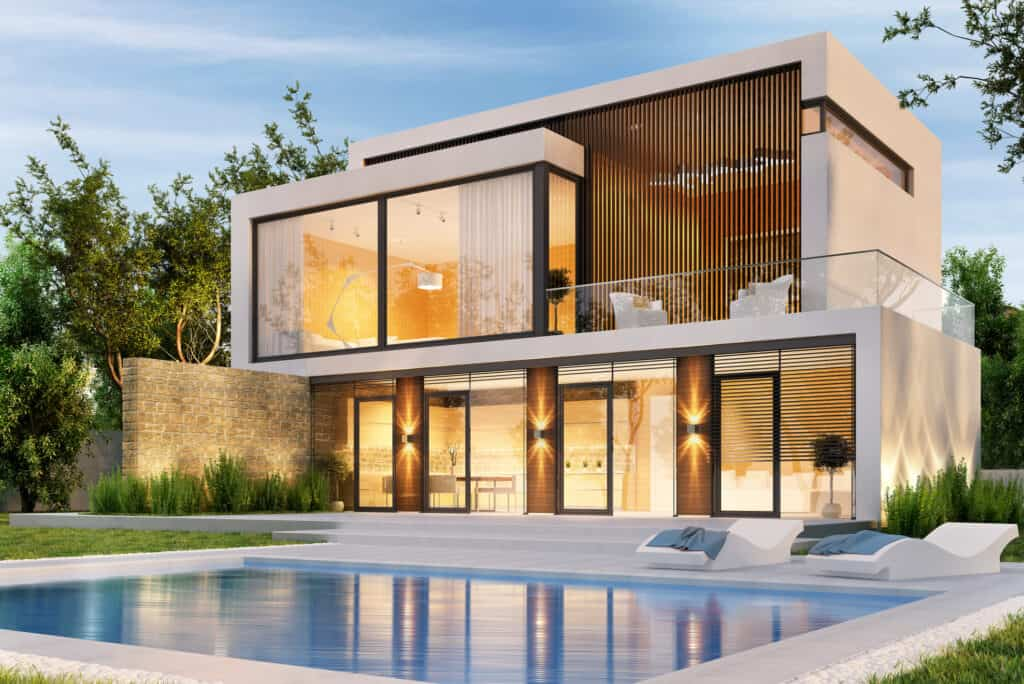

In [ ]:
from IPython.display import Image, display
image_path = '/content/Real estate.jpg'
display(Image(filename=image_path))

# Overview:

Premiere Property Group, a prominent real estate agency in King County, has experienced a decline in profits over the past three years. To address this challenge, the agency has sought analytical expertise to devise a strategic pricing approach aimed at optimizing profits.

This initiative involves a deep dive into the vast array of housing data from King County, focusing on pivotal factors that influence house prices. Central to this analysis are variables such as the age of properties, their condition and ratings within different locations, the presence of views and waterfronts, and the impact of seasonal trends on sales.

The ultimate goal is to establish a comprehensive pricing strategy that not only maximizes profits for Premiere Property Group but also adapts to the fluctuating dynamics of the King County real estate market.

## General Objective

To develop a comprehensive and data-driven pricing strategy that maximizes profitability for Premiere Property Group by thoroughly analyzing various factors influencing house prices in King County.

This general objective encompasses the overarching aim of the project, focusing on leveraging data analysis to enhance the agency's pricing approach in response to the recent decline in profits.

## Specific Objectives

**Age and Price Analysis:** Determine the impact of a house's age (year built) on its selling price and identify any significant patterns or trends that can be utilized in pricing strategies.

**Condition/Grade and Location Impact:** Assess the correlation between the condition or rating of a house and its sales price, especially considering the property's location, to understand how these factors influence valuation.

**Seasonal Pricing Trends:** Investigate if there are seasonal variations in house prices, particularly examining if houses sold in winter have different pricing dynamics compared to other seasons, and how this knowledge can be applied strategically.

**Effect of Views and Waterfront Accessibility:** Quantify the extent to which views and waterfront accessibility influence property pricing, and determine the value addition of these features to the overall property valuation.

These specific objectives are designed to address each of the research questions in detail, providing a structured approach to understanding the key drivers of house prices in King County. This approach will enable Premiere Property Group to make informed, data-backed decisions in their pricing strategies.


## Data

Utilizing the King County Housing Data Set, which encompasses details such as house size, location, condition, and various features, this project endeavors to construct an advanced multiple regression model. The primary objective is to develop a predictive model that can accurately estimate a house's price by incorporating the key factors. The emphasis is on optimizing the model's precision to enable effective predictions in the dynamic real estate landscape of King County.

### Column Names and descriptions for King County Data Set
* **id** - unique identified for a house
* **date** - Date house was sold
* **price** - Price is prediction target
* **bedrooms** - Number of Bedrooms/House
* **bathrooms** - Number of bathrooms/bedrooms
* **sqft_living** - square footage of the home
* **sqft_lot** - square footage of the lot
* **floors** - Total floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## Previewing the Data

In [ ]:
#load necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import markdown
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
#Load and preview the data
df = pd.read_csv('/content/kc_house_data.csv')
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Data Cleanup and Feature Engineering

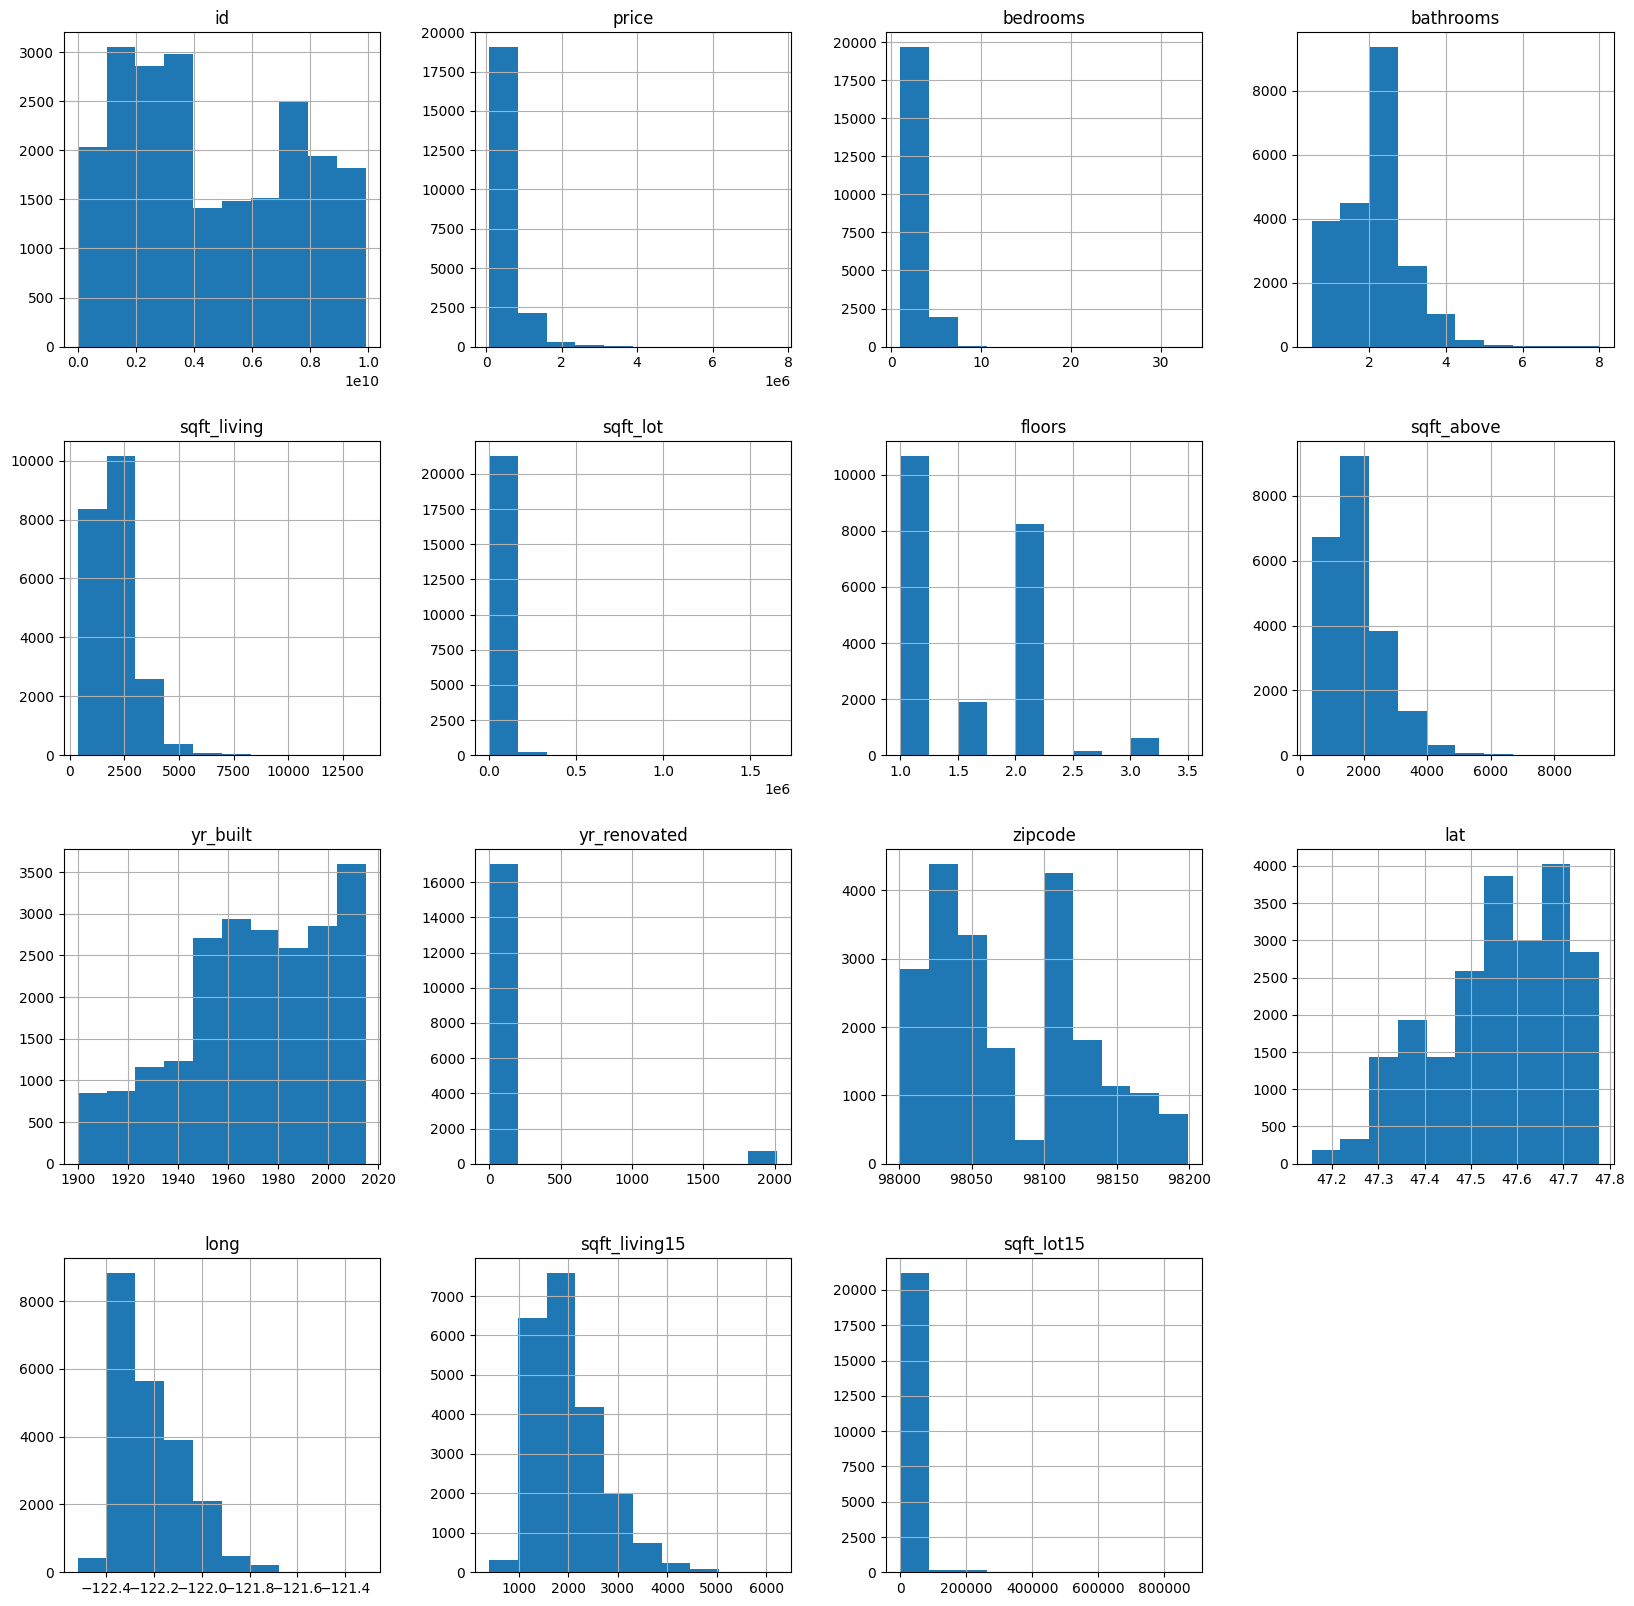

In [ ]:
#Summary of features before clean up

df.hist(figsize=(20,20));

In [ ]:
#Finding the number of null values in the data frame
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [ ]:
#1. Check for counts of unique values in waterfront
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [ ]:
#2. Fill in the missing values with No and convert to binary

df['waterfront'] = df['waterfront'].fillna('NO')
df['waterfront'] = df['waterfront'].map({'YES': 1, 'NO': 0})

#3. Check if code was responsive

df['waterfront'].value_counts()

0    21451
1      146
Name: waterfront, dtype: int64

In [ ]:
#4. Check for counts of unique values in view
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [ ]:
#5. Fill the missing values with None and check if code was responsive

df['view'].fillna("NONE", inplace=True)

df['view'].value_counts()

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [ ]:
#6. Check for counts of unique values in year renovated
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [ ]:
#7. Fill 0 in missing values of the year renovated
df['yr_renovated'].fillna(0, inplace=True)

In [ ]:
#8. To check the number of houses sold multiple times in the period under review
df['id'].value_counts()

795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: id, Length: 21420, dtype: int64

In [ ]:
#9. Convert View, condition and grade into representative numbers and replace question mark in sq ft basement
df['view'] = df['view'].map({'NONE': 1,'FAIR': 2,'AVERAGE': 3,'GOOD': 4,'EXCELLENT': 5}).astype(float)
df['condition'] = df['condition'].map({'Poor': 1,'Fair': 2,'Average': 3,'Good': 4,'Very Good': 5}).astype(float)
df['grade'] = df['grade'].map({'3 Poor': 1,'4 Low': 2,'5 Fair': 3,'6 Low Average': 4,'7 Average': 5,'8 Good': 6,'9 Better': 7,'10 Very Good': 8,'11 Excellent': 9,'12 Luxury': 10,'13 Mansion': 11}).astype(float)
df['sqft_basement'] = df['sqft_basement'].replace('?', 0).astype(float)

In [ ]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0   1.0  ...    5.0        1180            0.0   
1      7242     2.0           0   1.0  ...    5.0        2170          400.0   
2     10000     1.0           0   1.0  ...    4.0         770            0.0   
3      5000     1.0           0   1.0  ...    5.0        1050          910.0   
4      8080     1.0           0   1.0  ...    6.0        1680            0.0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955           0.0    98178  47.5112 -122.257           1340   
1      1951        1991.0    98125  47.7210 -122.319           1690   
2      1933           0.0    98028  47.7379 -122.233           2720   
3      1965           0.0    98136  47.5208 -122.393           1360   
4      1987           0.0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [ ]:
df.shape

(21597, 21)

In [ ]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0   1.0  ...    5.0        1180            0.0   
1      7242     2.0           0   1.0  ...    5.0        2170          400.0   
2     10000     1.0           0   1.0  ...    4.0         770            0.0   
3      5000     1.0           0   1.0  ...    5.0        1050          910.0   
4      8080     1.0           0   1.0  ...    6.0        1680            0.0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955           0.0    98178  47.5112 -122.257           1340   
1      1951        1991.0    98125  47.7210 -122.319           1690   
2      1933           0.0    98028  47.7379 -122.233           2720   
3      1965           0.0    98136  47.5208 -122.393           1360   
4      1987           0.0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [ ]:
df.duplicated().value_counts()

False    21597
dtype: int64

#Feature Engineering

In [ ]:
# create a new column 'Sale_Number' based on the count of values in 'id' column
Sales_in_df = df['id'].value_counts()
df['Sale_Number'] = df['id'].map(Sales_in_df)

# Converting 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Calculating age of the house
df['age_of_house'] = df['date'].dt.year - df['yr_built']

# Calculating years since renovation (handling houses that were never renovated)
df['years_since_renovation'] = df.apply(
    lambda row: row['date'].year - row['yr_renovated'] if row['yr_renovated'] != 0 else 0,
    axis=1)

# Calculating price per square foot
df['price_per_sqft'] = (df['price'] / df['sqft_living']).round(2)

# Calculating lot utilization ratio
df['lot_utilization'] = (df['sqft_living'] / df['sqft_lot']).round(2)

# Calculating neighborhood average price
neighborhood_avg_price = df.groupby('zipcode')['price'].mean().round(2).rename('neighborhood_avg_price')
df = df.join(neighborhood_avg_price, on='zipcode')

# Combining condition and grade scores
df['grade_score'] = df['condition'] + df['grade']

#Create a Season column and populate it as Spring, Summer, Fall, Winter
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'
df['season'] = df['date'].dt.month.apply(get_season)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      21597 non-null  int64         
 1   date                    21597 non-null  datetime64[ns]
 2   price                   21597 non-null  float64       
 3   bedrooms                21597 non-null  int64         
 4   bathrooms               21597 non-null  float64       
 5   sqft_living             21597 non-null  int64         
 6   sqft_lot                21597 non-null  int64         
 7   floors                  21597 non-null  float64       
 8   waterfront              21597 non-null  int64         
 9   view                    21597 non-null  float64       
 10  condition               21597 non-null  float64       
 11  grade                   21597 non-null  float64       
 12  sqft_above              21597 non-null  int64 

In [ ]:
df.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_living15  sqft_lot15  \
0      5650     1.0           0   1.0  ...           1340        5650   
1      7242     2.0           0   1.0  ...           1690        7639   
2     10000     1.0           0   1.0  ...           2720        8062   
3      5000     1.0           0   1.0  ...           1360        5000   
4      8080     1.0           0   1.0  ...           1800        7503   

   Sale_Number  age_of_house  years_since_renovation  price_per_sqft  \
0            1            59                     0.0          188.05   
1            1            63                    23.0          209.34   
2            1            82                     0.0          233.77   
3            1            49                     0.0          308.16   
4            1            28                     0.0          303.57   

   lot_utilization  neighborhood_avg_price  grade_score  season  
0             0.21               310612.76          8.0    Fall  
1             0.35               469928.77          8.0  Winter  
2             0.08               462488.87          7.0  Winter  
3             0.39               551768.52         10.0  Winter  
4             0.21               685675.84          9.0  Winter  

[5 rows x 29 columns]

#Outlier Identification

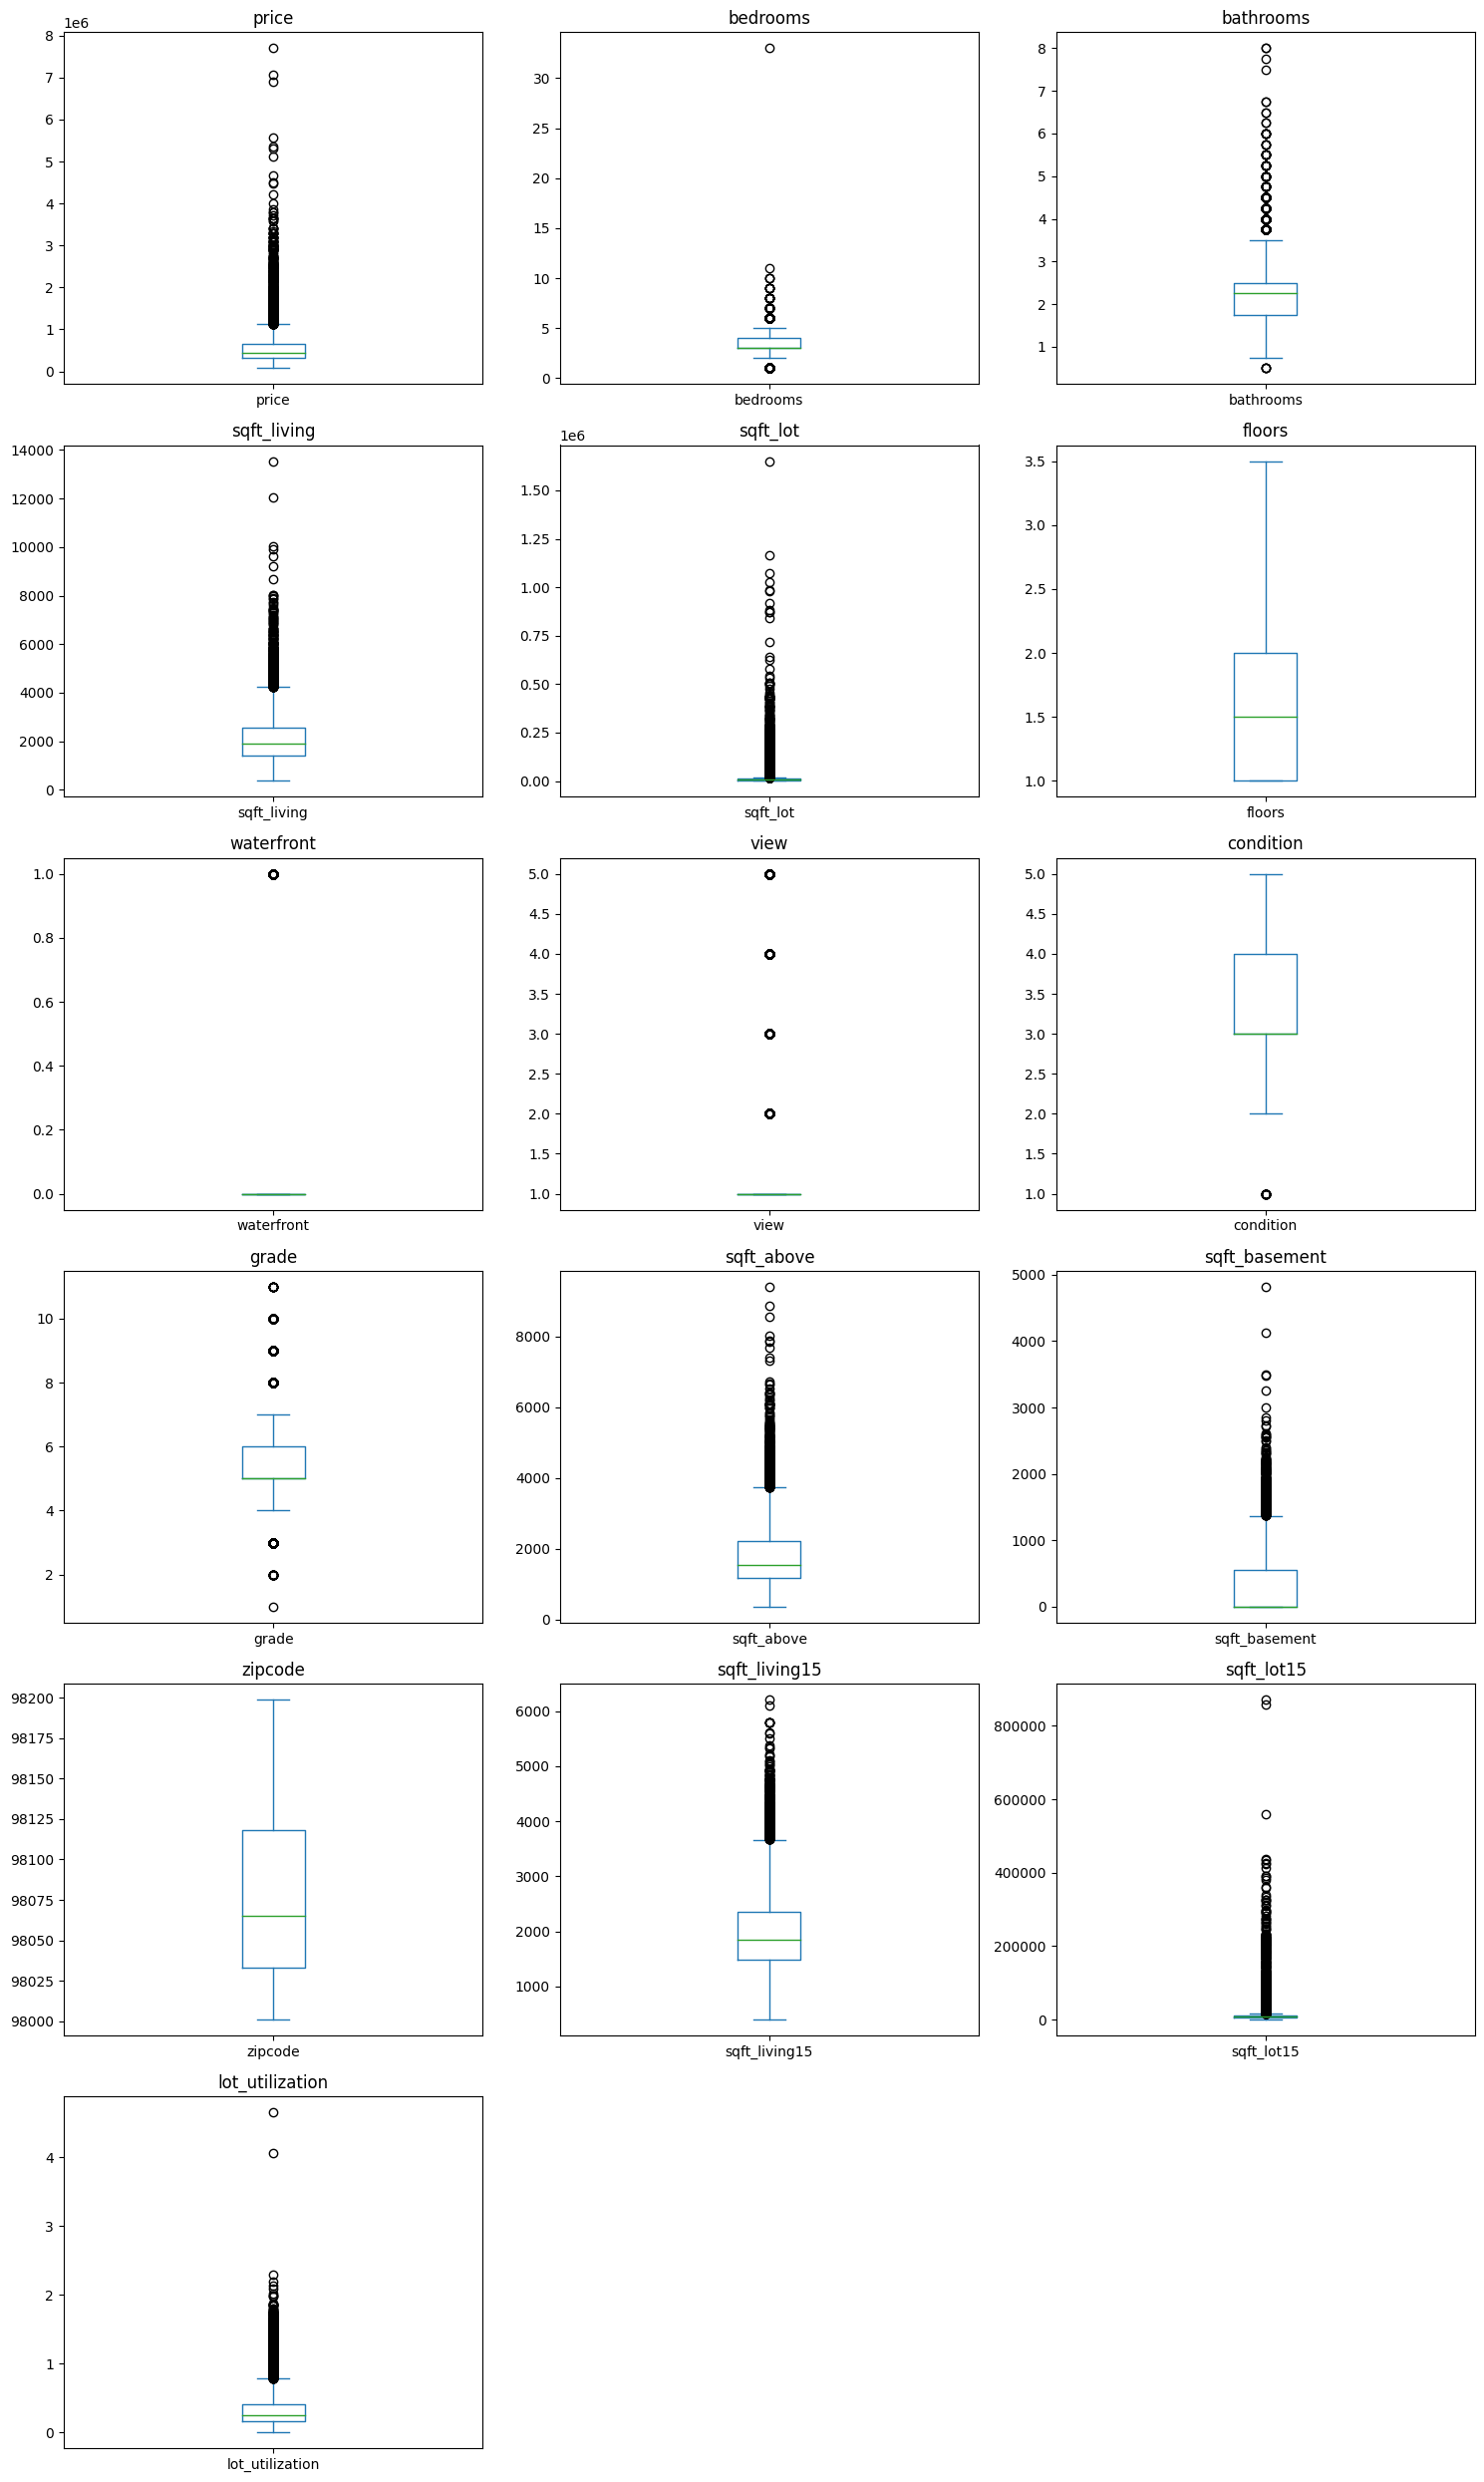

In [ ]:
# Create individual boxplots for selected columns
columns_to_plot = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'zipcode', 'sqft_living15', 'sqft_lot15', 'lot_utilization']

# Set the number of boxplots per row
boxplots_per_row = 3

# Calculate the number of rows needed
num_rows = -(-len(columns_to_plot) // boxplots_per_row)  # Ceiling division

# Create a subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=boxplots_per_row, figsize=(15, 25))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each boxplot
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    df[column].plot(kind='box', ax=ax)
    ax.set_title(column)

# Hide any remaining empty subplots
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Removing outliers observed in the box plots above
df = df.drop(df[df["bedrooms"] >= 10].index)
df = df.drop(df[df["sqft_living"] > 10000].index)
df = df.drop(df[df["price"] >= 1100000].index)

In [ ]:
# Count the number of sales for each house and merge with the original DataFrame
sale_counts = df.groupby('id').size().reset_index(name='NumSales')
df = pd.merge(df, sale_counts, on='id', how='left')

# Identify houses sold more than once
houses_sold_more_than_once = df[df['NumSales'] > 1].drop_duplicates('id')

# Generate Markdown report
markdown_report = f"# King County House Sales Report\n\n"
markdown_report += "## Houses Sold More Than Once\n\n"

for house_id, num_sales, total_earnings in houses_sold_more_than_once[['id', 'NumSales', 'price']].to_records(index=False):
    markdown_report += f"House Number {house_id} was sold {num_sales} times in the period under consideration, priced at {total_earnings}.\n"

# Export the Markdown report
with open('king_county_house_sales_report.md', 'w') as file:
    file.write(markdown_report)

# King County House Sales Report

## Houses Sold More Than Once

Find the full report under 'king_county_house_sales_report.md'

House Number 6021501535 was sold 2 times in the period under consideration, priced at 430000.0.\
House Number 4139480200 was sold 2 times in the period under consideration, priced at 1380000.0.\
House Number 7520000520 was sold 2 times in the period under consideration, priced at 232000.0.\
House Number 3969300030 was sold 2 times in the period under consideration, priced at 165000.0.\
House Number 2231500030 was sold 2 times in the period under consideration, priced at 315000.0.

In [ ]:
#Rename the 'id' column to 'house_number' and create a new index column named 'id'
df = df.rename(columns={'id': 'house_number'}).reset_index(drop=True)

In [ ]:
#Getting a report of number of renovations per year.


# Group by 'yr_renovated' and count the number of unique houses renovated more than once
renovation_counts = df[df['yr_renovated'] > 0].groupby('yr_renovated')['house_number'].nunique().reset_index(name='NumRenovations')

# Sort the renovation report from most renovations to least
renovation_counts = renovation_counts.sort_values(by='NumRenovations', ascending=False)

# Calculate the total number of renovations and the proportion to the number of unique house numbers
total_renovations = renovation_counts['NumRenovations'].sum()
num_unique_houses = df['house_number'].nunique()
proportion_to_unique_houses = total_renovations / num_unique_houses


# Print the total number of renovations and the proportion to the number of unique house numbers
print(f"\nTotal number of renovations: {total_renovations}")
print(f"Proportion to the number of unique house numbers: {proportion_to_unique_houses:.2%}")

# Print messages for the first 3 and last 3 years of renovations
for index, row in renovation_counts.head(3).iterrows():
    message = f"In {row['yr_renovated']}, there were {row['NumRenovations']} renovations."
    print(message)

# Print messages for the last 3 years of renovations
for index, row in renovation_counts.tail(3).iterrows():
    message = f"In {row['yr_renovated']}, there were {row['NumRenovations']} renovations."
    print(message)

# Generate Markdown report
markdown_report = f"# Renovation Report\n\n"
markdown_report += "## Houses Renovated More Than Once\n\n"
markdown_report += renovation_counts.to_markdown(index=False)

# Save the Markdown report to a file
with open('renovation_report.md', 'w') as file:
    file.write(markdown_report)


Total number of renovations: 612
Proportion to the number of unique house numbers: 3.03%
In 2014.0, there were 64.0 renovations.
In 2013.0, there were 29.0 renovations.
In 2000.0, there were 26.0 renovations.
In 1971.0, there were 1.0 renovations.
In 1976.0, there were 1.0 renovations.
In 1934.0, there were 1.0 renovations.


In [ ]:
df.describe()

house_number         price      bedrooms     bathrooms   sqft_living  \
count  2.036500e+04  2.036500e+04  20365.000000  20365.000000  20365.000000   
mean   4.602901e+09  4.745134e+05      3.325804      2.049055   1970.367150   
std    2.877858e+09  2.048530e+05      0.879369      0.708776    769.183262   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.131201e+09  3.150000e+05      3.000000      1.500000   1400.000000   
50%    3.905081e+09  4.360000e+05      3.000000      2.000000   1850.000000   
75%    7.338200e+09  6.000000e+05      4.000000      2.500000   2430.000000   
max    9.900000e+09  1.090000e+06      9.000000      7.500000   7480.000000   

           sqft_lot        floors    waterfront          view    condition  \
count  2.036500e+04  20365.000000  20365.000000  20365.000000  20365.00000   
mean   1.458500e+04      1.474908      0.002455      1.169163      3.40550   
std    4.006855e+04      0.536695      0.049490      0.633799      0.64612   
min    5.200000e+02      1.000000      0.000000      1.000000      1.00000   
25%    5.000000e+03      1.000000      0.000000      1.000000      3.00000   
50%    7.500000e+03      1.000000      0.000000      1.000000      3.00000   
75%    1.030000e+04      2.000000      0.000000      1.000000      4.00000   
max    1.651359e+06      3.500000      1.000000      5.000000      5.00000   

       ...  sqft_living15     sqft_lot15   Sale_Number  age_of_house  \
count  ...   20365.000000   20365.000000  20365.000000  20365.000000   
mean   ...    1919.086914   12426.434373      1.016843     43.509305   
std    ...     611.894606   26503.547344      0.129824     29.157708   
min    ...     399.000000     651.000000      1.000000     -1.000000   
25%    ...    1470.000000    5046.000000      1.000000     18.000000   
50%    ...    1800.000000    7540.000000      1.000000     40.000000   
75%    ...    2270.000000    9875.000000      1.000000     63.000000   
max    ...    4950.000000  871200.000000      3.000000    115.000000   

       years_since_renovation  price_per_sqft  lot_utilization  \
count            20365.000000    20365.000000     20365.000000   
mean                 0.571422      253.976417         0.320495   
std                  4.293114      100.087360         0.268611   
min                 -1.000000       87.590000         0.000000   
25%                  0.000000      178.860000         0.150000   
50%                  0.000000      237.650000         0.240000   
75%                  0.000000      305.000000         0.400000   
max                 80.000000      810.140000         4.650000   

       neighborhood_avg_price   grade_score      NumSales  
count            2.036500e+04  20365.000000  20365.000000  
mean             5.166326e+05      8.930960      1.016794  
std              2.012316e+05      1.118647      0.129642  
min              2.342840e+05      3.000000      1.000000  
25%              3.536191e+05      8.000000      1.000000  
50%              4.903771e+05      9.000000      1.000000  
75%              6.199442e+05     10.000000      1.000000  
max              2.161300e+06     14.000000      3.000000  

[8 rows x 28 columns]

In [ ]:
#Export the dataframe

# Specify the path where you want to save the CSV file
csv_file_path = 'export.csv'

# Export the entire DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

print(f'DataFrame exported to {csv_file_path}')

DataFrame exported to export.csv


In [ ]:
# Rename the original DataFrame to Original_df
Original_df = df.copy()

# Count the number of sales for each house
sale_counts = df.groupby('house_number').size().reset_index(name='NumSales')

# Add a new column indicating the number of sales for each house
df['NumSales'] = df.groupby('house_number')['house_number'].transform('count')

# Identify houses sold more than once
houses_sold_more_than_once = df[df['NumSales'] > 1]

# Keep the most recent sale for houses sold more than once
houses_sold_more_than_once = houses_sold_more_than_once.sort_values(by=['house_number', 'date'], ascending=[True, False])
houses_sold_more_than_once.drop_duplicates('house_number', keep='first', inplace=True)


# Drop houses sold more than once, keeping the most recent sale
df = pd.concat([df, houses_sold_more_than_once]).drop_duplicates(subset='house_number', keep='last')

# Drop the 'NumSales' column as it is no longer needed
df.drop(columns='NumSales', inplace=True)

In [ ]:
df.head()

house_number       date     price  bedrooms  bathrooms  sqft_living  \
0    7129300520 2014-10-13  221900.0         3       1.00         1180   
1    6414100192 2014-12-09  538000.0         3       2.25         2570   
2    5631500400 2015-02-25  180000.0         2       1.00          770   
3    2487200875 2014-12-09  604000.0         4       3.00         1960   
4    1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_living15  sqft_lot15  \
0      5650     1.0           0   1.0  ...           1340        5650   
1      7242     2.0           0   1.0  ...           1690        7639   
2     10000     1.0           0   1.0  ...           2720        8062   
3      5000     1.0           0   1.0  ...           1360        5000   
4      8080     1.0           0   1.0  ...           1800        7503   

   Sale_Number  age_of_house  years_since_renovation  price_per_sqft  \
0            1            59                     0.0          188.05   
1            1            63                    23.0          209.34   
2            1            82                     0.0          233.77   
3            1            49                     0.0          308.16   
4            1            28                     0.0          303.57   

   lot_utilization  neighborhood_avg_price  grade_score  season  
0             0.21               310612.76          8.0    Fall  
1             0.35               469928.77          8.0  Winter  
2             0.08               462488.87          7.0  Winter  
3             0.39               551768.52         10.0  Winter  
4             0.21               685675.84          9.0  Winter  

[5 rows x 29 columns]

In [ ]:
#Export the dataframe

# Specify the path where you want to save the CSV file
csv_file_path = 'new_export.csv'

# Export the entire DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

print(f'DataFrame exported to {csv_file_path}')

DataFrame exported to new_export.csv


##Objectives
An investigation of the house features to understand how they indivually affect the price.


In [ ]:
#A Summary of the  Features

summary_features = ["price", "yr_built", "bedrooms", "bathrooms", "sqft_living", "sqft_lot",
                    "floors", "condition", "grade", "sqft_living15", "sqft_lot15","waterfront"]
df[summary_features].describe()

price      yr_built      bedrooms     bathrooms   sqft_living  \
count  2.019500e+04  20195.000000  20195.000000  20195.000000  20195.000000   
mean   4.759371e+05   1970.913692      3.326269      2.051498   1973.013964   
std    2.045136e+05     29.162762      0.878000      0.708246    769.820134   
min    7.800000e+04   1900.000000      1.000000      0.500000    370.000000   
25%    3.150005e+05   1952.000000      3.000000      1.500000   1400.000000   
50%    4.380000e+05   1975.000000      3.000000      2.000000   1852.000000   
75%    6.000000e+05   1996.000000      4.000000      2.500000   2430.000000   
max    1.090000e+06   2015.000000      9.000000      7.500000   7480.000000   

           sqft_lot        floors     condition         grade  sqft_living15  \
count  2.019500e+04  20195.000000  20195.000000  20195.000000   20195.000000   
mean   1.462089e+04      1.476727      3.406635      5.530379    1920.930577   
std    4.020672e+04      0.537149      0.645672      1.030680     612.484430   
min    5.200000e+02      1.000000      1.000000      1.000000     399.000000   
25%    5.000000e+03      1.000000      3.000000      5.000000    1470.000000   
50%    7.500000e+03      1.000000      3.000000      5.000000    1800.000000   
75%    1.030500e+04      2.000000      4.000000      6.000000    2280.000000   
max    1.651359e+06      3.500000      5.000000     10.000000    4950.000000   

          sqft_lot15    waterfront  
count   20195.000000  20195.000000  
mean    12445.529438      0.002476  
std     26574.980740      0.049698  
min       651.000000      0.000000  
25%      5040.000000      0.000000  
50%      7532.000000      0.000000  
75%      9877.500000      0.000000  
max    871200.000000      1.000000

# 1. Age and Price Analysis
  An analysis of the age of the house and the selling price

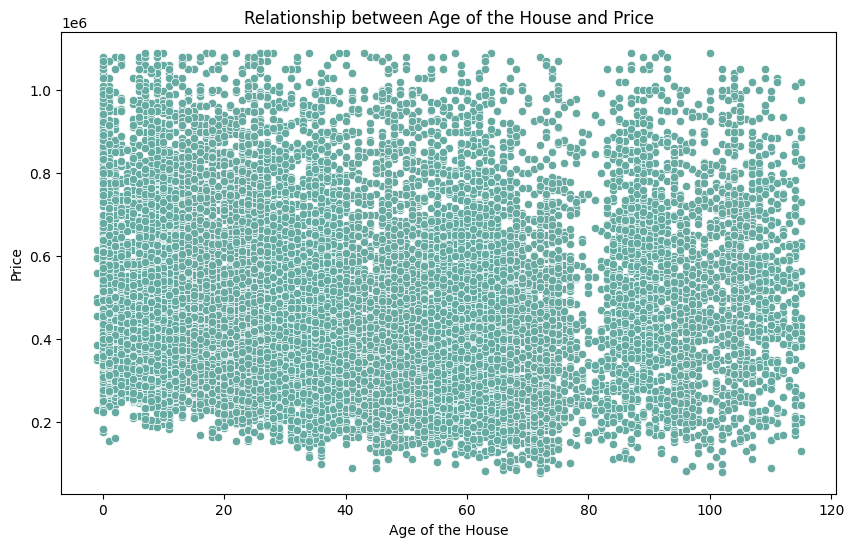

In [ ]:
#A visualisation of the age of the house and price

import matplotlib.pyplot as plt
import seaborn as sns

# Age of the house
df['age_of_house'] = df['date'].dt.year - df['yr_built']

# Selecting the columns of interest
summary_features = ["price", "age_of_house"]

# Creating a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=summary_features[1], y=summary_features[0], data=df, color='#66aaa2')
plt.title('Relationship between Age of the House and Price')
plt.xlabel('Age of the House')
plt.ylabel('Price')
plt.show()


In [ ]:
correlation_coefficient = df['age_of_house'].corr(df['price'])
print(f"Correlation Coefficient: {correlation_coefficient}")



Correlation Coefficient: -0.05853062659292519


The correlation coefficient is close to 0, it suggests a weak or no linear correlation between the variables. The age at sale and selling price are not strongly related in a linear fashion.

# 2. Condition/Grade and Location Impact on price
Building grade is a feature from King County government and represents the construction quality of improvements.

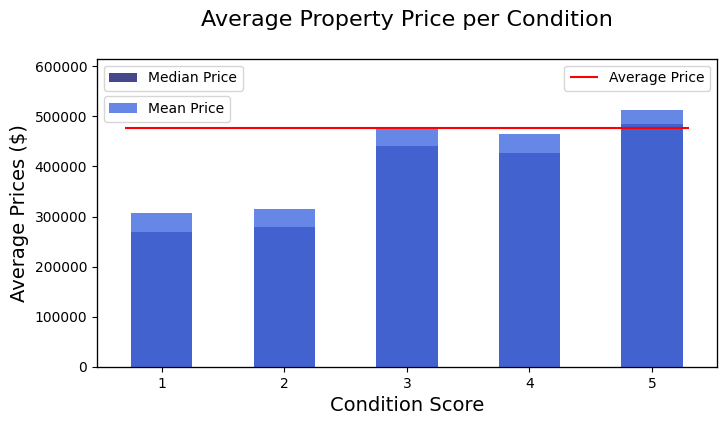

The property condition has a statistically significant impact on the average property price.
Conditions F-statistic Probability:  7.165237151000361e-40


In [ ]:
#Does the property condition affect the price
condition_mean = df.groupby("condition")["price"].mean()
condition_median = df.groupby("condition")["price"].median()
condition_score = np.arange(1,6)
mean_price = df.price.mean()

#Bar Plot
#set subplot data
fig, ax = plt.subplots(figsize=(8,4))
ax2 = ax.twinx() #set ax2 on same x axis as ax
ax3 = ax.twinx() #same as above, for hline
width = 0.5

#barplots
ax.bar(x=condition_score, height=condition_median, width=width,
       label="Median Price", color="midnightblue", alpha=0.8)
ax2.bar(x=condition_score, height=condition_mean, width=width,
        label="Mean Price", color="royalblue", alpha=0.8)

#horizontal line for mean price
ax3.hlines(mean_price, .7 ,5.3, colors="red", label="Average Price")

#set ylimit to the same scale and display only 1
ax.set_ylim(0,1.2*condition_mean.max())
ax2.set_ylim(0,1.2*condition_mean.max())
ax3.set_ylim(0,1.2*condition_mean.max())
ax2.yaxis.set_visible(False) #hide the 2nd axis
ax3.yaxis.set_visible(False)

#set legend positions
ax.legend(bbox_to_anchor=(0,0,1,1), loc="upper left")
ax2.legend(bbox_to_anchor=(0,-.1,1,1), loc="upper left")
ax3.legend(bbox_to_anchor=(0,0,1,1), loc="upper right")

#adjust graph to be more elaborate
ax.set_ylabel("Average Prices ($)", size=14)
ax.set_xlabel("Condition Score", size=14)
plt.title("Average Property Price per Condition", size=16, y=1.08)

# (How to export image) plt.savefig("images/condition_value.png",bbox_inches = "tight")
plt.legend()
plt.show();

#Assess the statistical significance of the categorical variable 'condition' on the dependent variable 'price' in the dataset.
alpha = 0.05
formula = 'price~C(condition)'
lm_condition = smf.ols(formula,df).fit()
anova_condition = sm.stats.anova_lm(lm_condition, typ=2)
if anova_condition["PR(>F)"][0] < alpha:
    print("The property condition has a statistically significant impact on the average property price.")
    print("Conditions F-statistic Probability: ", anova_condition["PR(>F)"][0])


3. Waterfront Price Correlation Analysis

 We have a waterfront feature which characterises houses which have a view of a waterfront. We investigate how this feature relates to price.

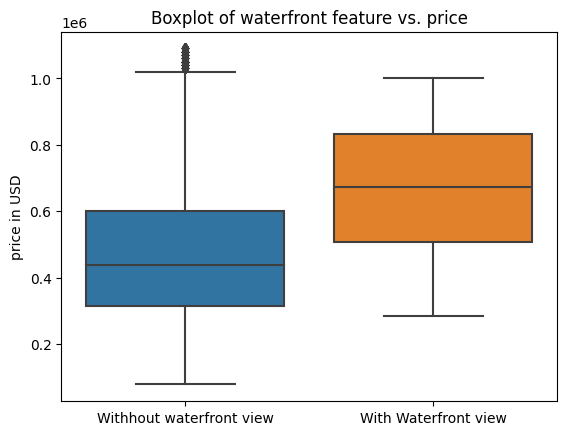

In [ ]:
# Plot boxplot of waterfront feature
sns.boxplot(x = df['waterfront'], y = df['price'])
plt.title("Boxplot of waterfront feature vs. price")
plt.ylabel("price in USD")
plt.xlabel(None)
plt.xticks(np.arange(2), ('Withhout waterfront view', 'With Waterfront view'))
plt.show()

In [ ]:
#An anlysis of the waterfront feature
waterfrontmean = df[df['waterfront'] == 1]['price'].mean()
nonwaterfrontmean = df[df['waterfront'] == 0]['price'].mean()
print(f"The mean house price for a house with waterfront view is USD {round(waterfrontmean,2)}")
print(f"The mean house price for a house without waterfront view is USD {round(nonwaterfrontmean,2)}")

#To find out what percentage of houses have the waterfront feature
percentage_waterfront =  len(df[df['waterfront'] == 1])/len(df)*100
print(f"Percentage of Houses with Waterfront Feature: {round(percentage_waterfront, 2)}%")


The mean house price for a house with waterfront view is USD 671667.0
The mean house price for a house without waterfront view is USD 475451.25
Percentage of Houses with Waterfront Feature: 0.25%


Waterfront living is key, with the mean house price for a house with a waterfront view being quite higher than those without the waterfront feature

4. Seasonal Pricing

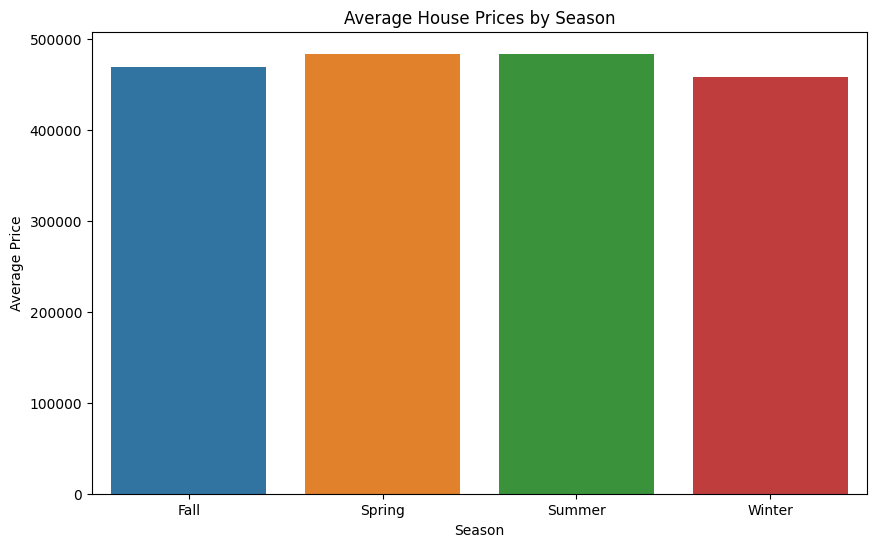

In [ ]:
# Visualization 3: Seasonal Price Trends
seasonal_prices = df.groupby('season')['price'].agg(['mean', 'median']).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='mean', data=seasonal_prices)
plt.title('Average House Prices by Season')
plt.xlabel('Season')
plt.ylabel('Average Price')
seasonal_price_trends_path = 'transformed_seasonal_price_trends.png'
plt.savefig(seasonal_price_trends_path)

# Data Modeling

#Predictive Modeling - Linear Regression

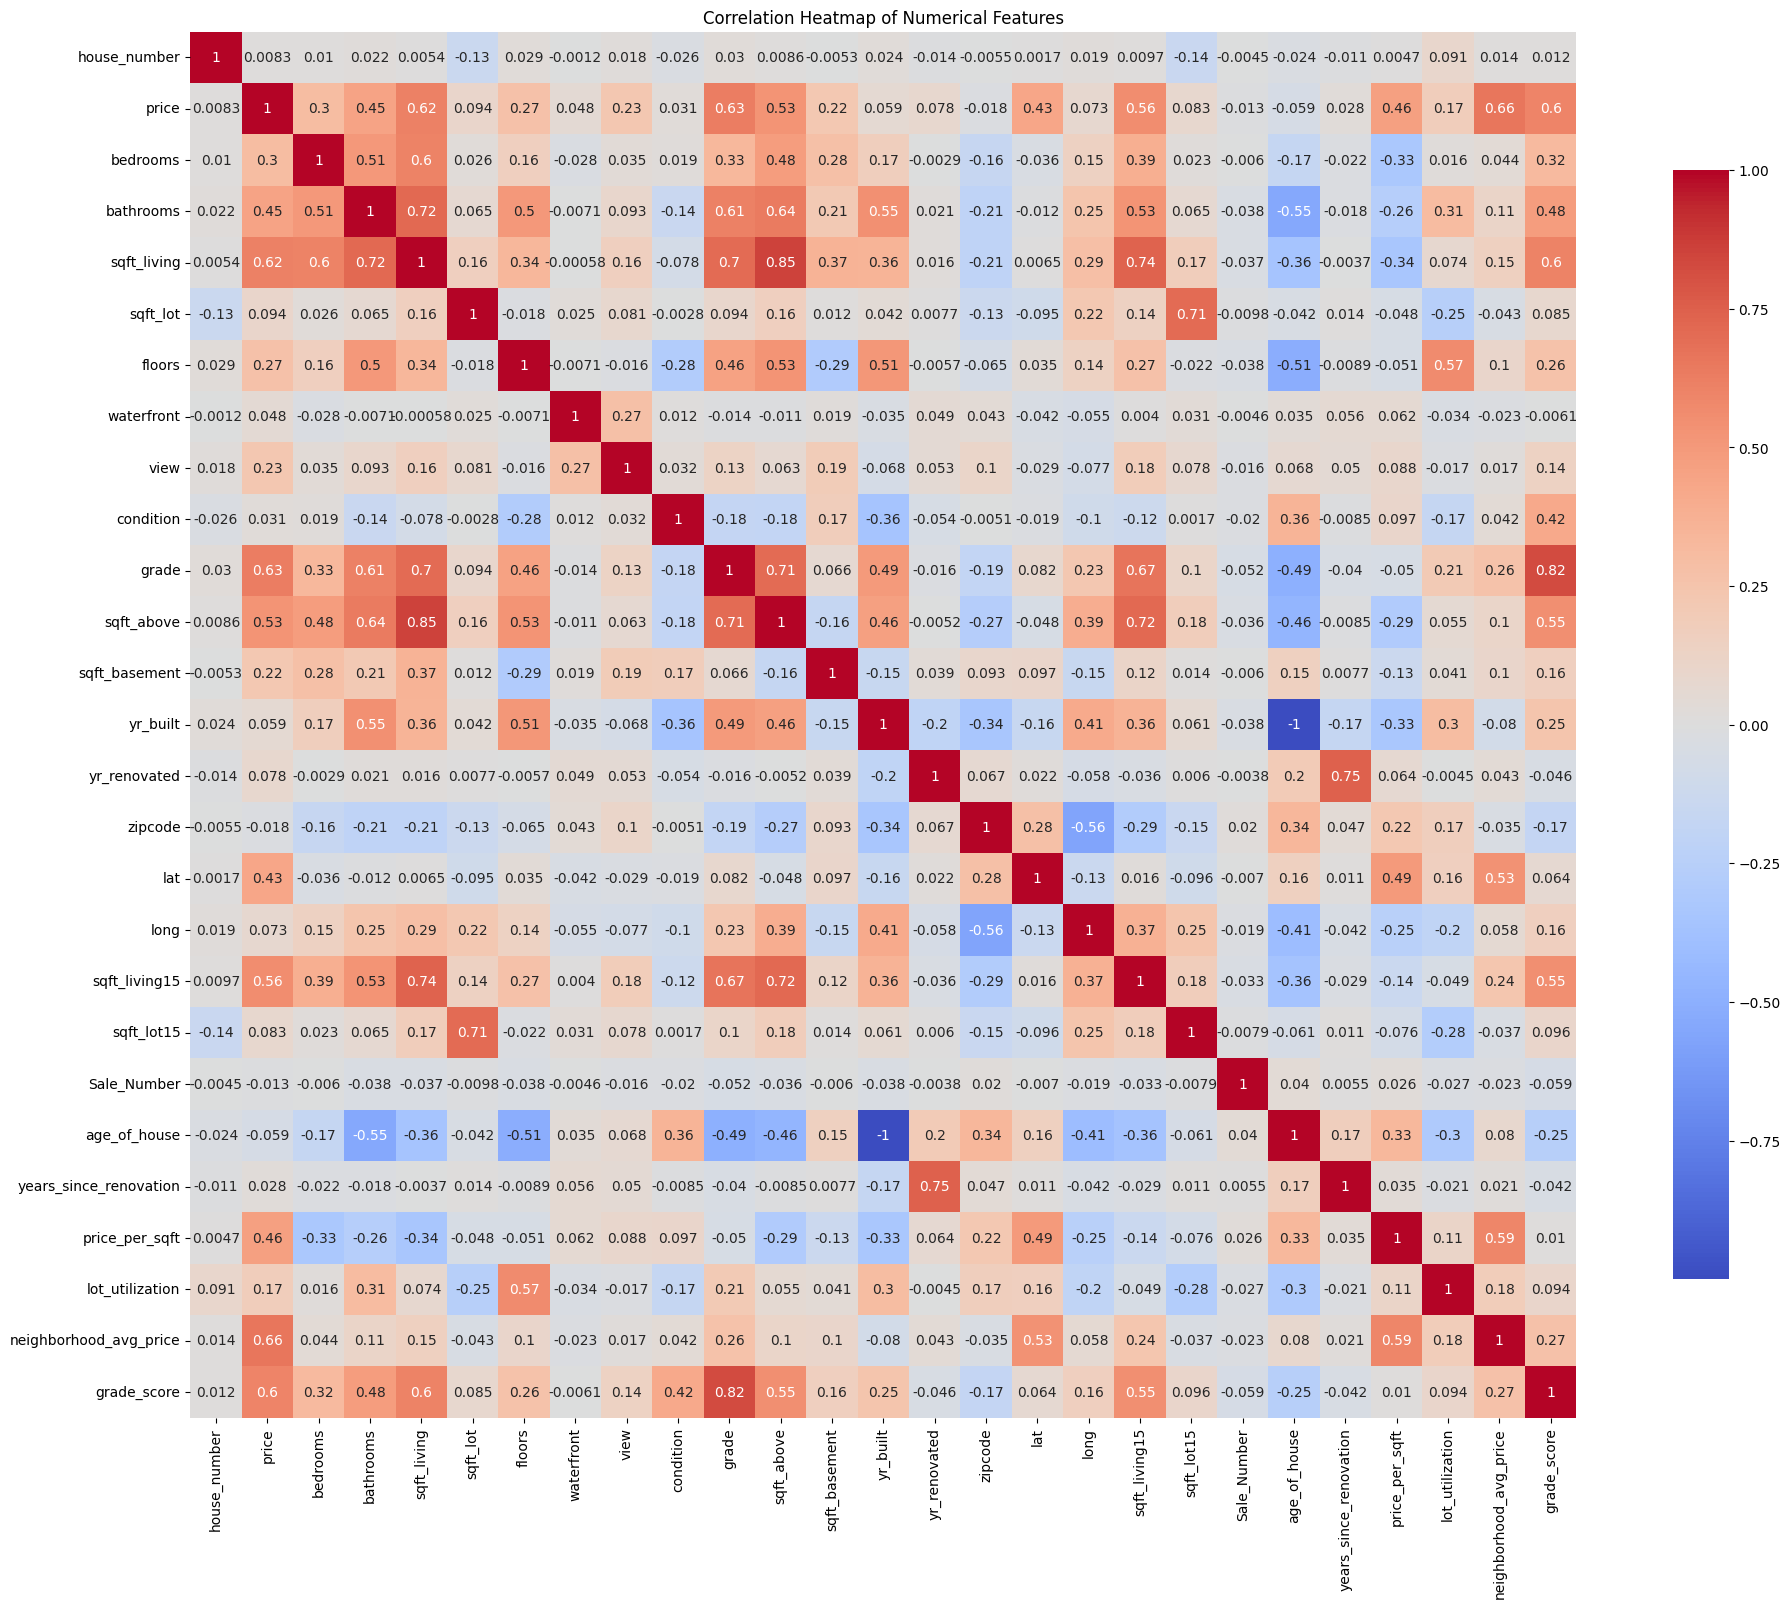

In [ ]:
#Correlation Heatmap
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(25, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',cbar_kws={"shrink":.8},square=True)
plt.title('Correlation Heatmap of Numerical Features')
correlation_heatmap_path = 'transformed_correlation_heatmap.png'
plt.savefig(correlation_heatmap_path)

In [ ]:
correlation_matrix = df.corr(numeric_only=True).abs()
stacked_correlations = correlation_matrix.stack().reset_index().sort_values(0, ascending=False)
stacked_correlations['column_pairs'] = list(zip(stacked_correlations['level_0'], stacked_correlations['level_1']))
pairs_indexed = stacked_correlations.set_index(['column_pairs'])
pairs_indexed.drop(columns=['level_0', 'level_1'], inplace=True)
pairs_indexed.columns = ['correlation_coefficient']
unique_pairs = pairs_indexed.drop_duplicates()
high_correlation_pairs = unique_pairs[
    (unique_pairs['correlation_coefficient'] > 0.65) & (unique_pairs['correlation_coefficient'] < 1)
]

# Display the result
print(high_correlation_pairs)

                                        correlation_coefficient
column_pairs                                                   
(yr_built, age_of_house)                               0.999871
(sqft_above, sqft_living)                              0.853135
(grade_score, grade)                                   0.821837
(yr_renovated, years_since_renovation)                 0.746735
(sqft_living, sqft_living15)                           0.736988
(sqft_above, sqft_living15)                            0.717173
(bathrooms, sqft_living)                               0.715998
(sqft_lot15, sqft_lot)                                 0.708728
(grade, sqft_above)                                    0.708585
(grade, sqft_living)                                   0.703167
(grade, sqft_living15)                                 0.670014
(neighborhood_avg_price, price)                        0.663947


In this analysis, we observe significant correlations among various pairs of variables. To address potential multicollinearity issues in our model, we will consider the removal of variables that exhibit high correlation with each other.

## Baseline Model

In [ ]:
# Define independent variables
independent_vars = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_basement',  'zipcode','age_of_house', 'years_since_renovation',  'grade_score']

# Add a constant term to the independent variables
X = sm.add_constant(df[independent_vars])

# Define the dependent variable
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model using scikit-learn
linear_model = sm.OLS(y_train, X_train).fit()

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Calculate metrics
mse_linear = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)

# Print the OLS summary
print(linear_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     1616.
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:45:16   Log-Likelihood:            -2.1370e+05
No. Observations:               16156   AIC:                         4.274e+05
Df Residuals:                   16142   BIC:                         4.275e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1.03

The model has an Adj. R-squared value of 0.565, indicating that approximately 56.5% of the variability in the dependent variable (price) is explained by the independent variables in the model.
However, the p-value for sqft_lot is larger than 0.05 indicating that we do not have strong evidence to reject the null hypothesis. we will therefore drop the sqft_lot in the next iteration.

## 1st Iteration

In [ ]:
# Define independent variables
independent_vars = ['bedrooms', 'bathrooms', 'sqft_living', 'floors','zipcode', 'waterfront', 'view', 'condition',   'sqft_basement', 'age_of_house', 'years_since_renovation',   'grade_score']

# Add a constant term to the independent variables
X = sm.add_constant(df[independent_vars])

# Define the dependent variable
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model using scikit-learn
linear_model = sm.OLS(y_train, X_train).fit()

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Calculate metrics
mse_linear = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)

# Print the OLS summary
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     1750.
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:45:16   Log-Likelihood:            -2.1370e+05
No. Observations:               16156   AIC:                         4.274e+05
Df Residuals:                   16143   BIC:                         4.275e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      -

The model has an Adj. R-squared value of 0.565, indicating that approximately 56.5% of the variability in the dependent variable (price) is explained by the independent variables in the model.
To further improve our model,we will add Seasons to determine whether it affects the house price.

## 2nd Iteration

In [ ]:
df=df.join(pd.get_dummies(df.season)).drop(['season'],axis=1)

In [ ]:
# Define independent variables
independent_vars = ['bedrooms', 'bathrooms', 'sqft_living', 'floors','zipcode', 'waterfront', 'view', 'condition',   'sqft_basement', 'age_of_house', 'years_since_renovation',   'grade_score','Spring', 'Summer','Fall']

# Add a constant term to the independent variables
X = sm.add_constant(df[independent_vars])

# Define the dependent variable
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model using scikit-learn
linear_model = sm.OLS(y_train, X_train).fit()

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Calculate metrics
mse_linear = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)

# Print the OLS summary
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     1411.
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:45:16   Log-Likelihood:            -2.1366e+05
No. Observations:               16156   AIC:                         4.274e+05
Df Residuals:                   16140   BIC:                         4.275e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -9.93

1. The model has an Adj. R-squared value of 0.567, indicating that approximately 56.7% of the variability in the dependent variable (price) is explained by the independent variables in the model. This model does not show significant improvement from the previous model without season.
2. For the next Iteration we will add the all the zipcodes to the model to assess its correlation between the sales price.

## Final Model

To further improve our model, we will incooporate a new data set with City names to replace the Zipcodes

In [ ]:
shapefile_path = '/content/Zipcodes_for_King_County_and_Surrounding_Area___zipcode_area.shp'

# Read the shapefile into a GeoDataFrame
gdf = gpd.read_file(shapefile_path)
gdf = gdf.drop_duplicates(subset='ZIPCODE', keep='first')
selected_columns = ['ZIPCODE', 'PREFERRED_']
zipcode_names = gdf[selected_columns]
zipcode_names = zipcode_names.copy()
zipcode_names.rename(columns={'ZIP': 'zipcode', 'PREFERRED_': 'City_Name'}, inplace=True)


In [ ]:
zipcode_names['ZIPCODE'] = zipcode_names['ZIPCODE'].astype('int64')
df = df.merge(zipcode_names, how='left', left_on='zipcode', right_on='ZIPCODE')

In [ ]:
df['City_Name'] = df['City_Name'].map({
    'SAMMAMIISH': 'SAMMAMISH'}).fillna(df['City_Name'])

In [ ]:
df=df.join(pd.get_dummies(df.City_Name)).drop(['City_Name'],axis=1)
# We will drop Bellevue to be the reference column for the cities.

In [ ]:
df.columns

Index(['house_number', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Sale_Number',
       'age_of_house', 'years_since_renovation', 'price_per_sqft',
       'lot_utilization', 'neighborhood_avg_price', 'grade_score', 'Fall',
       'Spring', 'Summer', 'Winter', 'ZIPCODE', 'AUBURN', 'BELLEVUE',
       'BLACK DIAMOND', 'BOTHELL', 'CARNATION', 'DUVALL', 'ENUMCLAW',
       'FALL CITY', 'FEDERAL WAY', 'ISSAQUAH', 'KENMORE', 'KENT', 'KIRKLAND',
       'MAPLE VALLEY', 'MEDINA', 'MERCER ISLAND', 'NORTH BEND', 'REDMOND',
       'RENTON', 'SAMMAMISH', 'SEATTLE', 'SNOQUALMIE', 'VASHON',
       'WOODINVILLE'],
      dtype='object')

In [ ]:
df = df.drop(columns=['ZIPCODE','zipcode',])

In [ ]:
# Define independent variables
independent_vars = ['bedrooms', 'bathrooms', 'sqft_living',  'floors', 'waterfront', 'view', 'Fall','Spring','Summer', 'age_of_house','sqft_basement', 'grade_score','AUBURN', 'SEATTLE', 'BLACK DIAMOND', 'BOTHELL', 'CARNATION',
       'DUVALL', 'ENUMCLAW', 'FALL CITY','FEDERAL WAY', 'ISSAQUAH', 'KENMORE',
       'KENT', 'KIRKLAND', 'MAPLE VALLEY', 'MEDINA', 'MERCER ISLAND',
       'NORTH BEND', 'REDMOND', 'RENTON', 'SAMMAMISH',  'SNOQUALMIE',
       'VASHON','WOODINVILLE']

# Add a constant term to the independent variables
X = sm.add_constant(df[independent_vars])

# Define the dependent variable
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model using scikit-learn
linear_model = sm.OLS(y_train, X_train).fit()

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Calculate metrics
mse_linear = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)
rmse = np.sqrt(mse_linear)
# Print the OLS summary
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     1115.
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:45:17   Log-Likelihood:            -2.1050e+05
No. Observations:               16156   AIC:                         4.211e+05
Df Residuals:                   16120   BIC:                         4.213e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.042e+05   1.05e+04    -19.450

1. The model has an Adj. R-squared value of 0.708, indicating that approximately 70.8% of the variability in the dependent variable (price) is explained by the independent variables in the model.


In [ ]:
print("Root Mean Squared Error (RMSE) for the model is :", rmse)

Root Mean Squared Error (RMSE) for the model is : 110526.16077083671


## Summary of the Final Model
1. R-squared: 0.707

Adjusted R-squared: 0.707 These values indicate the proportion of the variance in the dependent variable ('price') that is explained by the independent variables in the model. An R-squared of 0.708 suggests that approximately 70.8% of the variability in house prices is explained by the model.

2. F-statistic:

1115.0 Prob (F-statistic): 0.00 The F-statistic tests the overall significance of the regression model. A low p-value (0.00) indicates that at least one independent variable is significantly related to the dependent variable eg; waterfront and price.

3. Log-Likelihood:

-2.1050e+05 This is a measure of how well the model explains the observed data. Lower values are better thus our model proves sufficient.

4. AIC and BIC:

AIC: 4.211e+05 BIC: 4.213e+05 These are information criteria that balance the goodness of fit with the complexity of the model. Lower values are generally preferred. Although our values are relatively low, additional data should be added to further refine the model.

5. Number of Observations and Residuals:

No. Observations: 16156 Df Residuals: 16120 These indicate the number of data points used in the analysis and the degrees of freedom for residuals.

6. Number of Independent Variables:

Df Model: 35 It indicates the number of independent variables used in the model.

7. Constant (const):

The intercept. When all independent variables are zero, the estimated mean house price is approximately $ 2,042.

8. Direction of Relationship:

Positive Coefficients: A positive coefficient indicates a positive relationship between the independent variable and the dependent variable. As the value of the independent variable increases, the predicted value of the dependent variable also increases.If the coefficient for 'waterfront' is positive, it suggests that houses with waterfront access are, on average, associated with higher prices compared to houses without waterfront access.

9. Negative Coefficients:

A negative coefficient indicates a negative relationship. As the value of the independent variable increases, the predicted value of the dependent variable decreases.If the coefficient for the variable 'bedrooms' is negative, it suggests that, on average, an increase in the number of bedrooms is associated with a decrease in house price. This might imply that larger houses with more bedrooms are generally less valuable in the given context.

10. Categorical Variables (e.g., Cities):

The coefficients for cities represent the average difference in house prices compared to a reference city.A negative coefficient for a specific city might suggest that, on average, houses in that city have lower prices compared to a reference city (BELLEVUE). Eg, MEDINA area has the highest property value Vs ISSAQUAH which is the lowest.

11. Seasonal Variables (e.g., Fall, Spring, Summer):

Some seasonal variables have coefficients with p-values suggesting insignificance. These variables might not contribute significantly to explaining house prices although we can see that 'spring' (0.000) has the most significant impact on price.

#Conclusions
Positive Influencers on Price:

The presence of additional bathrooms, increased square footage, higher floors, waterfront access, captivating views, and elevated grade scores positively impact house prices.
Notably, the inclusion of cities like Medina and Mercer Island in the analysis reveals their positive association with higher property values.

Negative Influencers on Price:

The number of bedrooms, certain city affiliations (e.g., Auburn, Federal Way, Kent), in reference to Bellevue, and specific features (e.g., Fall Season, City) exhibit a negative correlation with house prices.
Premiere Property Group should be cognizant of these factors when devising pricing strategies.

Seasonal and Unique Factors:

While some seasonal variables do not significantly impact prices, it's crucial to note that the age of the house and the presence of a basement can influence pricing dynamics.

City-Specific Considerations:

Each city has a unique influence on house prices, emphasizing the need for tailored strategies for different locations


Based on the comprehensive analysis of the King County housing data, here are the final recommendations and opportunities for further analysis:

## __Recommendations:__

__Dynamic Pricing Strategy:__ \
Implement a pricing strategy that accounts for property size (especially living area square footage), location (specific zipcodes and cities), and property features (like condition and grade).
Emphasize premium features like large living spaces, desirable locations, views, and waterfront access in pricing and marketing efforts.

__Seasonal Marketing and Sales Tactics:__ \
Capitalize on the higher market activity and prices in Spring and Summer for listing and selling properties.
Consider more competitive pricing and marketing strategies in Fall and Winter to attract buyers during slower market periods.

__Location-Focused Investment:__ \
Identify and invest in areas with high-demand zipcodes and emerging markets.
Leverage insights from location-based analysis to make informed decisions about property acquisitions, developments, or renovations.

__Data-Driven Decision Making:__ \
Continue to use data analytics for informed decision-making in all aspects of real estate transactions, from pricing to marketing to investment strategies.



##__Opportunities for Further Analysis:__

__Micro-Location Trends:__ \
Conduct a deeper analysis at a neighborhood level within specific zipcodes or cities to uncover more nuanced market trends and investment opportunities.

__Long-Term Market Trends:__ \
Analyze historical data over several years to understand long-term trends in the real estate market, including price appreciation rates in different areas.

__Economic and Demographic Factors:__ \
Incorporate broader economic indicators and demographic data to understand how macroeconomic conditions and population trends impact the real estate market.

__Advanced Predictive Modeling:__ \
Employ more advanced machine learning techniques, such as gradient boosting or neural networks, for more accurate price predictions and market trend analysis.

__Impact of Renovations:__ \
Investigate how different types of renovations and improvements impact property values, which could guide investment decisions for property upgrades.

__Customer Segmentation and Targeting:__ \
Use data analytics to segment potential buyers or renters and tailor marketing strategies to different target groups.

__Impact of External Factors:__ \
Assess the impact of external factors such as new infrastructure developments, zoning changes, or policy shifts on local real estate markets.\
By continuously leveraging data analytics and staying attuned to market trends, Premiere Property Group can maintain a competitive edge in the dynamic King County real estate market.

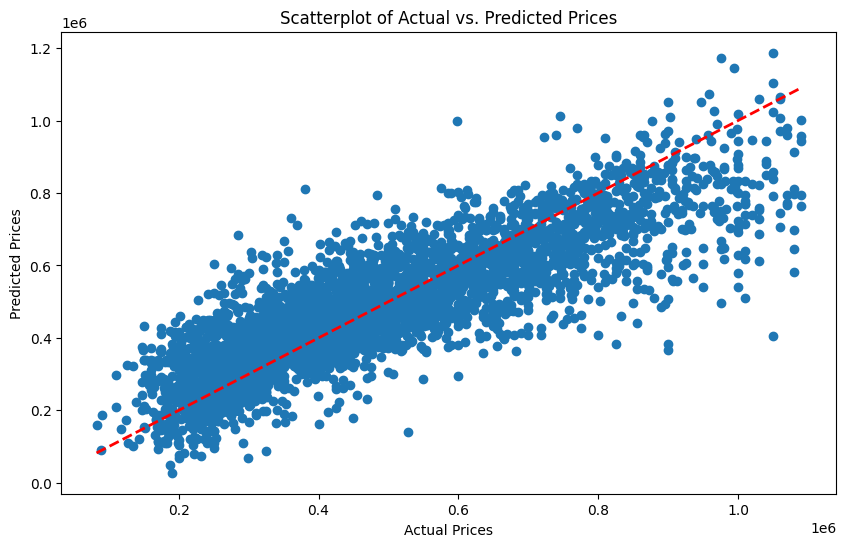

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Scatterplot of Actual vs. Predicted Prices')
plt.show()

Below is a histogram of the residuals from the above model. It passes the normality test.

Text(0.5, 0, 'Model Residuals')

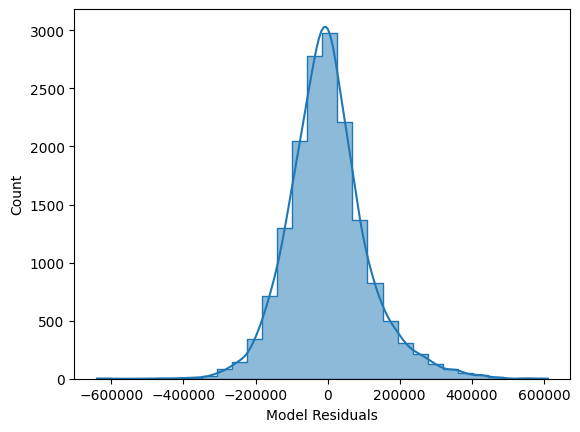

In [ ]:
fig, ax = plt.subplots()
sns.histplot(linear_model.resid, bins=30, element="step", kde=True, ax=ax)
ax.set_xlabel("Model Residuals")

Random Forest Regressor Iteration

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Creating and fitting the Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluating the Random Forest model
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, y_pred_rf)

rf_rmse, rf_r2


(106906.07040961123, 0.7336174090799462)

**Comparison with Previous Models:**\
The RMSE has significantly decreased to 102,388.17, indicating a substantial improvement in prediction accuracy.\
The R² score has increased notably from 0.71 to 0.76, showing that the Random Forest model explains a much larger proportion of the variability in house prices.\
**Interpretation:**\
The Random Forest Regressor, with its ability to capture complex interactions and non-linear relationships, has provided a significantly better fit to the data than the simpler linear regression models.\
This improvement suggests that the factors influencing house prices in King County are multifaceted and non-linear in nature.

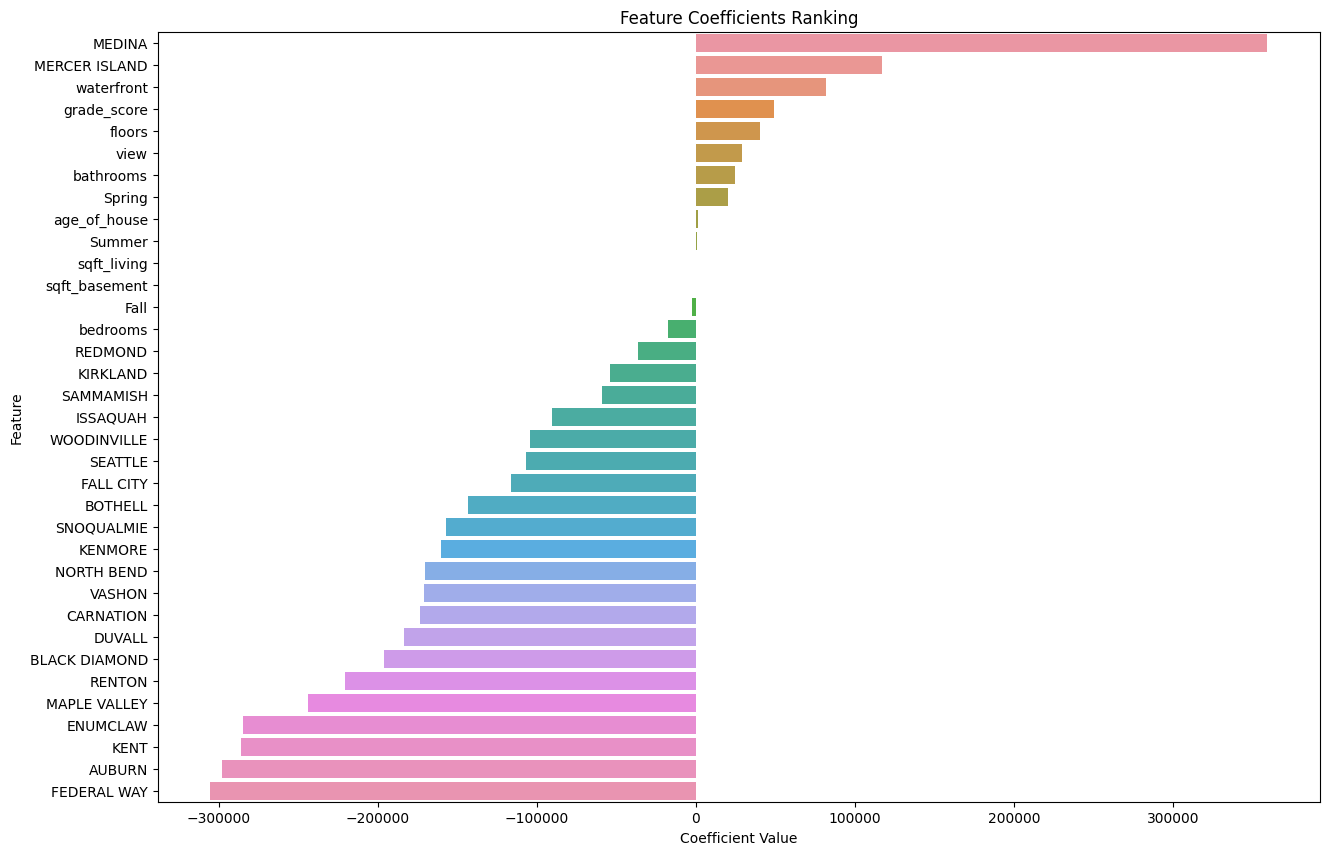

In [ ]:
# Extracting coefficients and feature names
coefficients = linear_model.params[1:]  # Assuming the first coefficient is the intercept
features = coefficients.index

# Creating a DataFrame
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients.values})

# Sorting the DataFrame by coefficients in descending order
sorted_coef_df = coef_df.sort_values('Coefficient', ascending=False)

# Optional: Visualizing all features
plt.figure(figsize=(15, 10))
sns.barplot(x='Coefficient', y='Feature', data=sorted_coef_df)
plt.title('Feature Coefficients Ranking')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')

# Show the plot
plt.show()

## Presentation Visualization
1.Age of the house vs Price

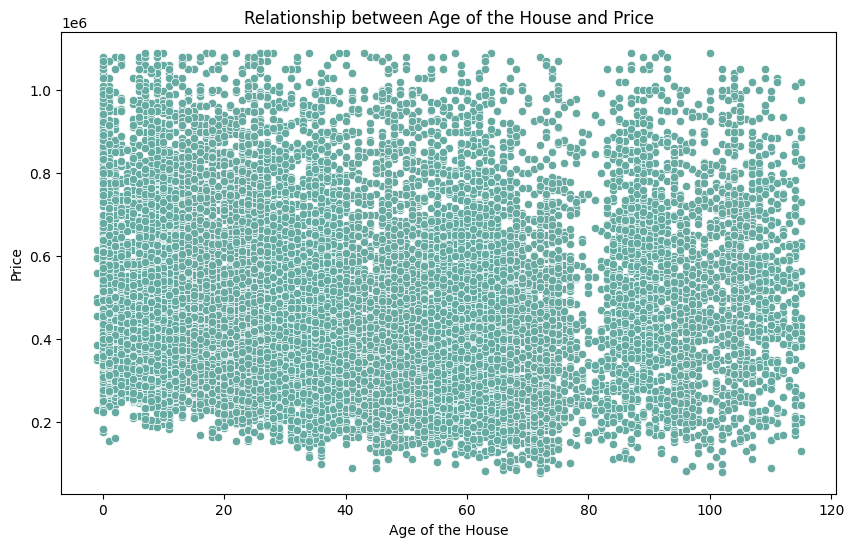

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age of the house
df['age_of_house'] = df['date'].dt.year - df['yr_built']

# Selecting the columns of interest
summary_features = ["price", "age_of_house"]

# Creating a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=summary_features[1], y=summary_features[0], data=df, color='#66aaa2')
plt.title('Relationship between Age of the House and Price')
plt.xlabel('Age of the House')
plt.ylabel('Price')
plt.show()


 2.Grade vs Price



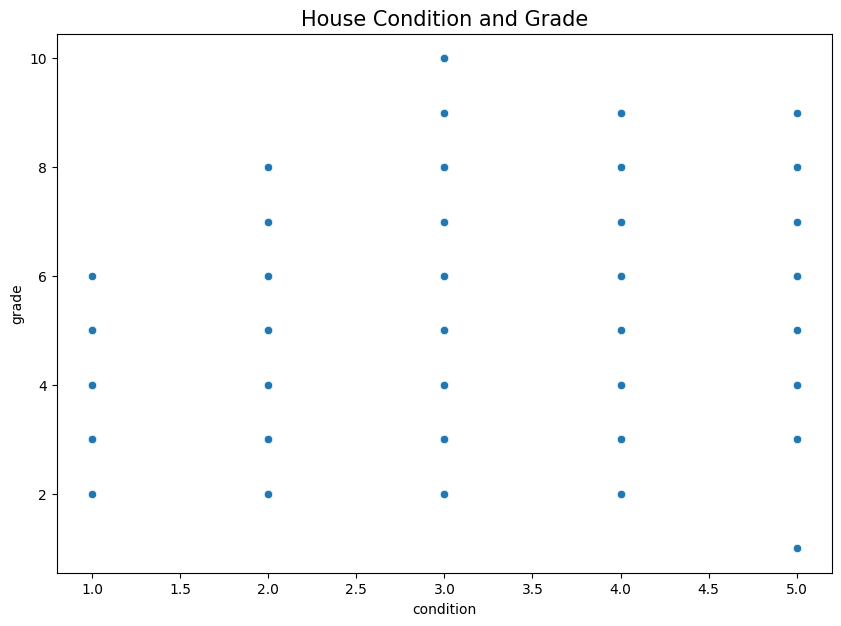

In [ ]:
#House Condition vs Grade
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['condition'], y=df['grade'])
plt.title('House Condition and Grade', fontsize=15,)
plt.show()


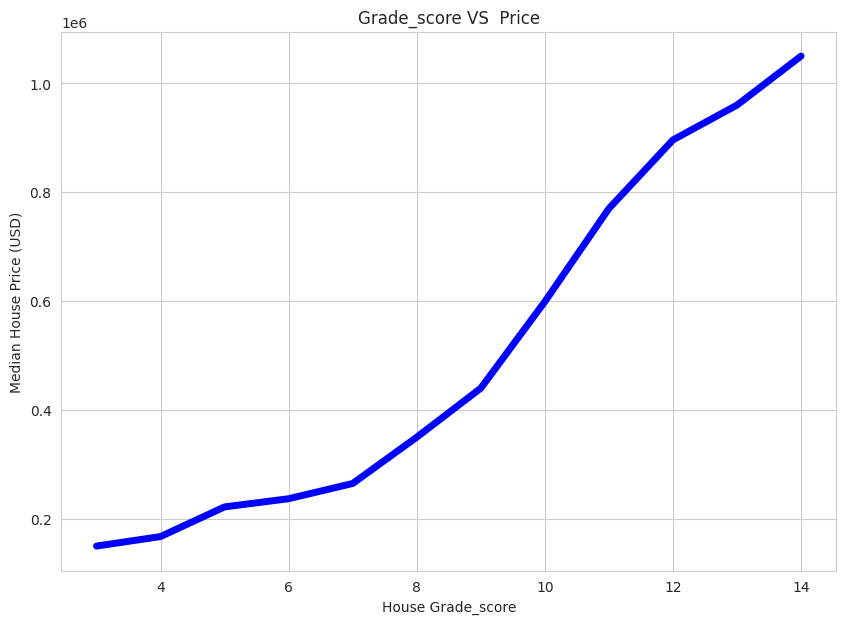

In [ ]:

# Groupby grade_score and take median price
dfgrade_score = df.groupby(df['grade_score'])['price'].median().sort_values(ascending = False)

# Reset index after groupy
dfgrade_score = dfgrade_score.reset_index()

# Check
plt.figure(figsize=(10,7))
dfgrade_score
with sns.axes_style("whitegrid"):
    sns.lineplot(x = dfgrade_score['grade_score'], y = dfgrade_score['price'], lw = 5, color = '#0000FF', data = dfgrade_score)
#plt.xticks(range(3,13))
plt.ylabel('Median House Price (USD)')
plt.xlabel('House Grade_score')
plt.title('Grade_score VS  Price')
plt.show()

3.Seasonal Pricing Trends

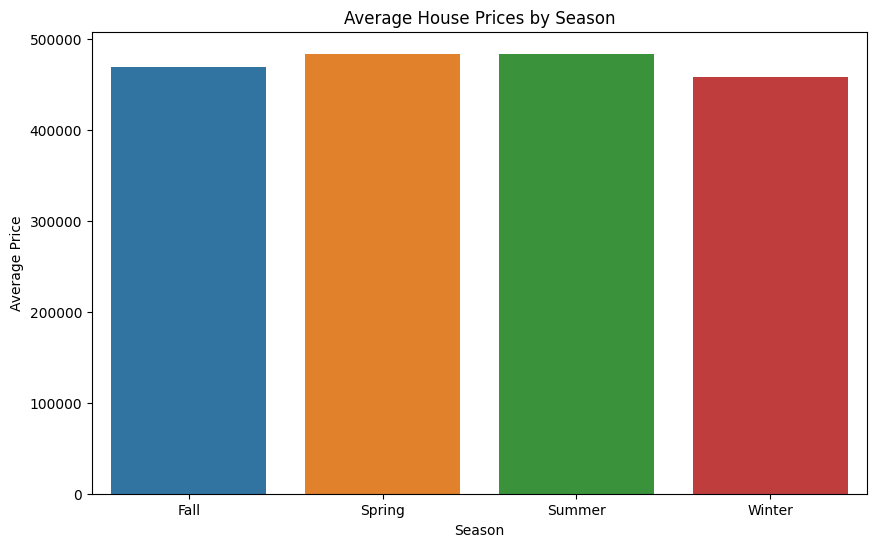

In [ ]:
#Create a Season column and populate it as Spring, Summer, Fall, Winter
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'
df['season'] = df['date'].dt.month.apply(get_season)

# Visualization 3: Seasonal Price Trends
seasonal_prices = df.groupby('season')['price'].agg(['mean', 'median']).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='mean', data=seasonal_prices)
plt.title('Average House Prices by Season')
plt.xlabel('Season')
plt.ylabel('Average Price')
seasonal_price_trends_path = 'transformed_seasonal_price_trends.png'
plt.savefig(seasonal_price_trends_path)

4. Location vs Price

<Axes: xlabel='long', ylabel='lat'>

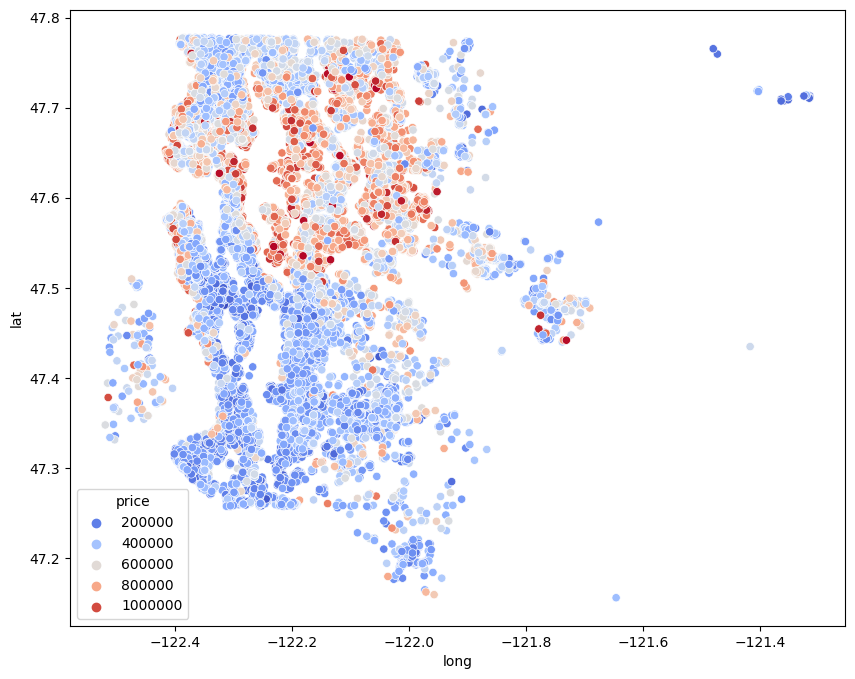

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot( x ='long',y ='lat',data=df,hue='price',palette='coolwarm')

In [ ]:
import folium
import json
# Load datasets and calculate average prices as before
# Load the housing data
kc_house_data = pd.read_csv('kc_house_data.csv')

# Load the GeoJSON file
with open('zipcode_area.geojson', 'r') as file:
    zip_geojson = json.load(file)

avg_price_per_zipcode = kc_house_data.groupby('zipcode')['price'].mean().reset_index()

map_center_lat = kc_house_data['lat'].mean()

map_center_lng = kc_house_data['long'].mean()

# Create the Folium map
folium_map = folium.Map(

    location=[map_center_lat, map_center_lng],
    tiles='OpenStreetMap',
    zoom_start=10,    # Initial zoom level
    min_zoom=10,      # Minimum zoom level, set equal to initial to prevent zooming
    max_zoom=10,      # Maximum zoom level, set equal to initial to prevent zooming
    dragging=False,   # Disable dragging
    scrollWheelZoom=False,  # Disable zooming with the scroll wheel
    zoom_control=False, # Disable zoom controls
    max_bounds=True  # Restrict the view to the map's initial boundaries
)

# Define a function to get the price for a given zipcode
def get_price(zipcode):
    price = avg_price_per_zipcode[avg_price_per_zipcode['zipcode'] == zipcode]['price']
    return price.iloc[0] if not price.empty else None

# Add the choropleth layer
folium.Choropleth(
    geo_data=zip_geojson,
    name='choropleth',
    data=avg_price_per_zipcode,
    columns=['zipcode', 'price'],
    key_on='feature.properties.ZIPCODE',  # Adjust based on your GeoJSON file's structure
    fill_color='YlOrRd',  # A yellow-orange-red color scale
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average House Price'
).add_to(folium_map)

# Add popups
for feature in zip_geojson['features']:
    zipcode = feature['properties']['ZIPCODE']
    price = get_price(zipcode)
    if price:
        folium.Marker(
            location=[feature['properties']['lat'], feature['properties']['long']],
            popup=f'Zipcode: {zipcode}<br>Average Price: {price:.2f}',
            icon=folium.Icon(icon_color='white')
        ).add_to(folium_map)

# Save or display the map
folium_map.save('kc_house_price_choropleth_map.html')

folium_map